# Лаборатораня работа №1: Создание "истории о данных" (Data Storytelling).

In [1]:
#Датасет содержит данные о кредитах на покупку электроники, которые были одобрены Tinkoff.ru. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

from warnings import simplefilter 
simplefilter('ignore')

/var/folders/gz/m94k093d78n9_d630f4dkl240000gn/T/ipykernel_90854/1838757490.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')

# История о данных:

In [3]:
# смотрим на первые пять строк
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


## 1) Обработка пропусков в данных

In [4]:
#проверяем типы данных и заполненность столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [5]:
#удаляем столбец с номером клиента (так как он незначимый) 
# и с регионом проживания (так как он нуждается в серьезной предобработке)
data.drop(['client_id'], axis=1, inplace=True) # 'living_region'

In [6]:
# анализируем столбец marital_status, смотрим, какое значение в нем является самым частым 
data['marital_status'].describe()

count     170743
unique         5
top          MAR
freq       93954
Name: marital_status, dtype: object

In [7]:
# анализируем столбец education, смотрим, какое в нем самое частое значение
data['education'].describe()

count     170741
unique         5
top          SCH
freq       87537
Name: education, dtype: object

In [8]:
# дозаполняем нечисловые столбцы с пропусками самыми часто встречающимися значениями
data['marital_status'].fillna('MAR', inplace=True)
data['education'].fillna('SCH', inplace=True)

In [9]:
# дозаполняем числовые столбцы с пропусками медианными значениями
data['age'].fillna(data['age'].median(), inplace=True)
data['credit_count'].fillna(data['credit_count'].median(), inplace=True)
data['overdue_credit_count'].fillna(data['overdue_credit_count'].median(), inplace=True)

In [10]:
#меняем в столбцах 'credit_sum', 'score_shk'  запятые на точки  и преобразуем их в числовой  формат
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [11]:
# дозаполняем ставшие теперь числовыми столбцы 'credit_sum', 'score_shk'   медианными значениями
data['score_shk'].fillna(data['score_shk'].median(), inplace=True)
data['monthly_income'].fillna(data['monthly_income'].median(), inplace=True)
data['credit_sum'].fillna(data['credit_sum'].median(), inplace=True)

In [12]:
# смотрим, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170746 non-null  float64
 2   marital_status        170746 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170746 non-null  float64
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  float64
 7   score_shk             170746 non-null  float64
 8   education             170746 non-null  object 
 9   living_region         170554 non-null  object 
 10  monthly_income        170746 non-null  float64
 11  credit_count          170746 non-null  float64
 12  overdue_credit_count  170746 non-null  float64
 13  open_account_flg      170746 non-null  int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 18.

In [13]:
region = pd.DataFrame(data=data['living_region'], columns=['living_region'])
region = region.apply(pd.Series.value_counts)

In [14]:
region[region['living_region'] > 100]

,living_region
living_region,
ОБЛ МОСКОВСКАЯ,12228
КРАСНОДАРСКИЙ КРАЙ,7457
САНКТ-ПЕТЕРБУРГ,5632
МОСКВА,5529
ТАТАРСТАН РЕСП,5187
...,...
ЛЕНИНГРАДСКАЯ ОБЛАСТЬ,124
РЕСПУБЛИКА КАРЕЛИЯ,114
РЕСПУБЛИКА КАЛМЫКИЯ,111


* Целевым признаком является факт выдачи кредита (задача классификации) 

In [15]:
cred_sum = data['credit_sum']

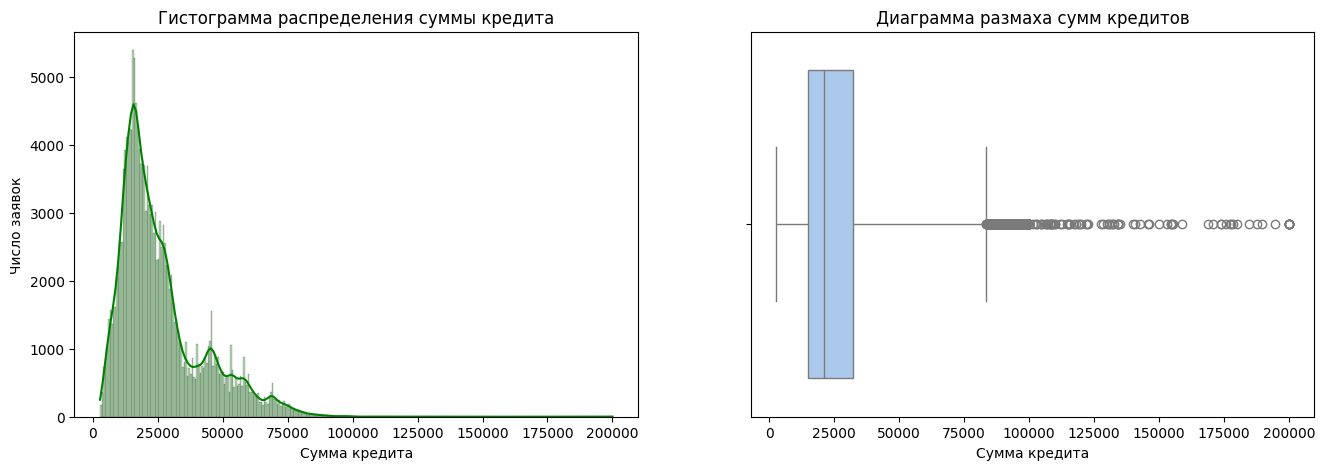

In [16]:
fig = plt.figure(figsize=(16, 5))
axes = fig.subplots(1 ,2)

sns.histplot(cred_sum, kde=True, color='green', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения суммы кредита")
axes[0].set_xlabel('Сумма кредита')
axes[0].set_ylabel('Число заявок')

sns.boxplot(x=cred_sum, ax=axes[1], whis=3, palette='pastel');
axes[1].title.set_text('Диаграмма размаха сумм кредитов')
axes[1].set_xlabel('Сумма кредита')
plt.show()

#plt.hist(data['credit_sum'], 50)
#plt.show()

In [17]:
cred_sum.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170746 entries, 0 to 170745
Series name: credit_sum
Non-Null Count   Dtype  
--------------   -----  
170746 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [18]:
cred_sum_lower_90000 = cred_sum[cred_sum < 90000]

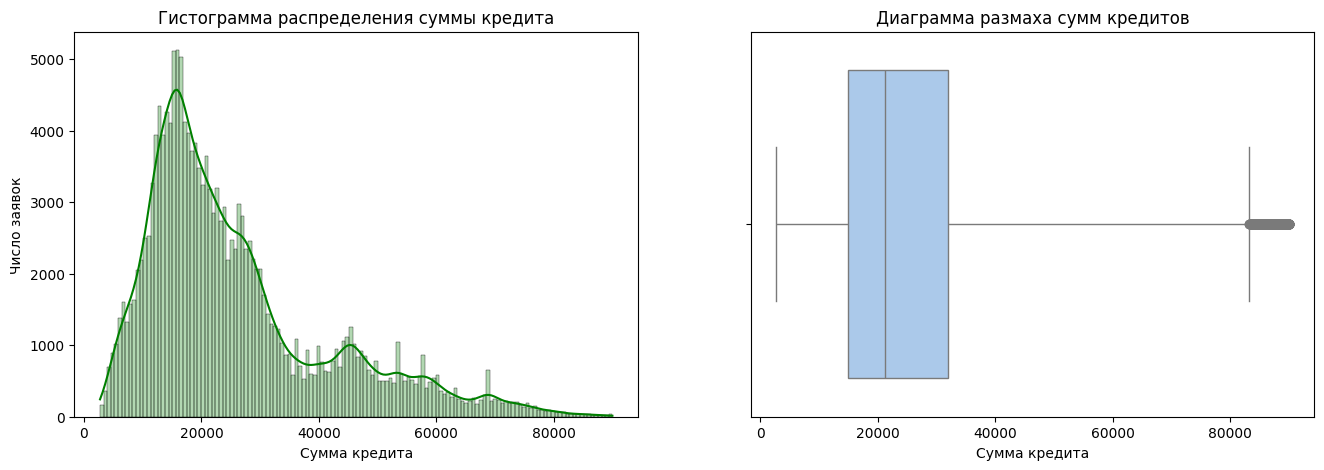

In [19]:
fig = plt.figure(figsize=(16, 5))
axes = fig.subplots(1 ,2)

sns.histplot(cred_sum_lower_90000, kde=True, color='green', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения суммы кредита")
axes[0].set_xlabel('Сумма кредита')
axes[0].set_ylabel('Число заявок')

sns.boxplot(x=cred_sum_lower_90000, ax=axes[1], whis=3, palette='pastel');
axes[1].title.set_text('Диаграмма размаха сумм кредитов')
axes[1].set_xlabel('Сумма кредита')
plt.show()

In [20]:
def show_marks(X, ax, percent=False, vert=False):
    if vert:
        ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
    else:
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

    for i, bar in enumerate(ax.patches):
        if vert:
            h = bar.get_width()
            ax.text(h+ax.get_xlim()[1]*0.055, i, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + ('%' if percent else ''),
                    ha='center', va='center')
        else:
            h = bar.get_height()
            ax.text(i, h+ax.get_ylim()[1]*0.04, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + ('%' if percent else ''),
                    ha='center', va='center')

def my_countplot(X, feature, figsize, title, xlabel, ylabel, vert=False, sort=False):
    fig = plt.figure(figsize=figsize)
    order = (X[feature].value_counts().index if sort else None)
    plot = sns.countplot(y=X[feature] if vert else None, x=None if vert else X[feature], order=order, palette='pastel')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    show_marks(X, plot.axes, True, vert)
    plt.show()

def my_barplot(X, feature_name, target_name, x_label, title, info, figsiz, hue_feature=None, legend_title=None):
    plt.figure(figsize=figsiz)
    if hue_feature:
        my_plot = sns.barplot(x=X[feature_name], y=X[target_name], saturation=1, hue=X[hue_feature])
        my_plot.legend(title=legend_title);
    else:
        order = X.groupby(feature_name)[target_name].mean().sort_values(ascending=False).index
        sns.barplot(x=X[feature_name], y=X[target_name], order=order, palette='RdYlGn', saturation=1)
    plt.title(f'Зависимость {info} от {title} (доверительная вероятность = 0.95)')
    plt.ylabel(f'Среднее {info}');
    plt.xlabel(x_label)
    plt.xticks(rotation=90)

In [21]:
region = pd.DataFrame(data=data['living_region'])

In [22]:
region.head()

,living_region
0,КРАСНОДАРСКИЙ КРАЙ
1,МОСКВА
2,ОБЛ САРАТОВСКАЯ
3,ОБЛ ВОЛГОГРАДСКАЯ
4,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ


In [23]:
region_value_count = region.apply(pd.Series.value_counts)
region_value_count = region_value_count[region_value_count['living_region'] > 2000]

In [24]:
region_mask = data[data['living_region'].isin(region_value_count.index)]

In [25]:
region_mask.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,34.0,MAR,UMN,59998.00,10,1.6,0.461599,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,34.0,MAR,UMN,10889.00,6,1.1,0.461599,SCH,МОСКВА,35000.0,2.0,0.0,0
3,F,27.0,MAR,SPC,12009.09,12,1.1,0.461599,SCH,ОБЛ ВОЛГОГРАДСКАЯ,35000.0,2.0,0.0,0
6,M,34.0,MAR,SPC,10317.00,6,1.5,0.461599,SCH,ОБЛ НИЖЕГОРОДСКАЯ,28000.0,3.0,0.0,0
8,M,23.0,UNM,SPC,37577.16,12,1.6,0.461599,SCH,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,50000.0,3.0,0.0,0


In [26]:
region_mask.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95830 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                95830 non-null  object 
 1   age                   95830 non-null  float64
 2   marital_status        95830 non-null  object 
 3   job_position          95830 non-null  object 
 4   credit_sum            95830 non-null  float64
 5   credit_month          95830 non-null  int64  
 6   tariff_id             95830 non-null  float64
 7   score_shk             95830 non-null  float64
 8   education             95830 non-null  object 
 9   living_region         95830 non-null  object 
 10  monthly_income        95830 non-null  float64
 11  credit_count          95830 non-null  float64
 12  overdue_credit_count  95830 non-null  float64
 13  open_account_flg      95830 non-null  int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 11.0+ MB


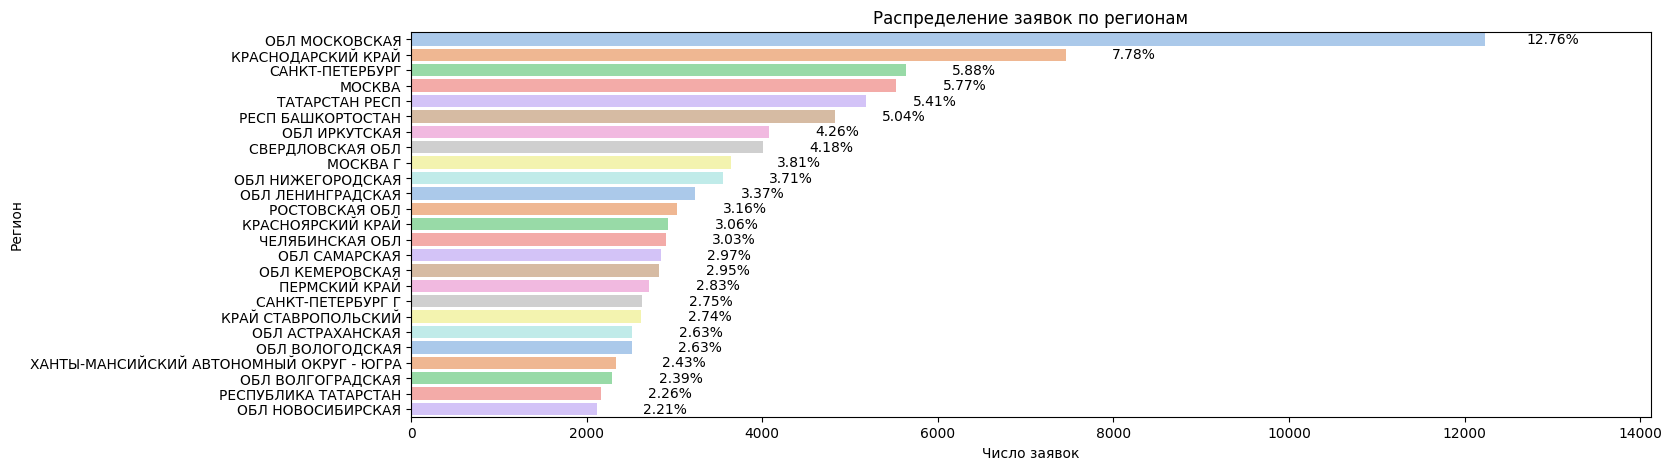

In [27]:
my_countplot(region_mask, 'living_region', (16,5), 'Распределение заявок по регионам', 'Число заявок', 'Регион', True, sort=True)

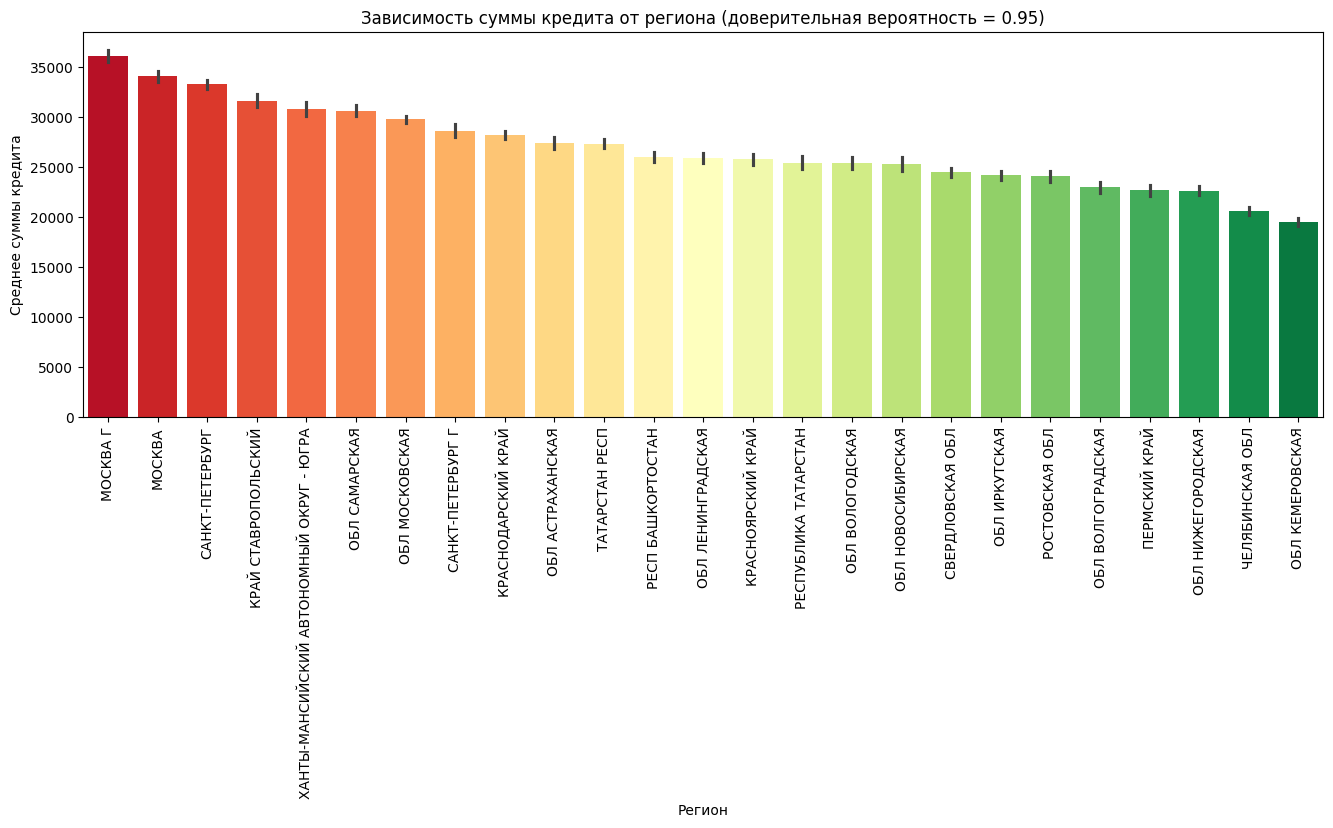

In [28]:
my_barplot(region_mask, 'living_region', 'credit_sum', 'Регион', 'региона', 'суммы кредита', (16, 5))

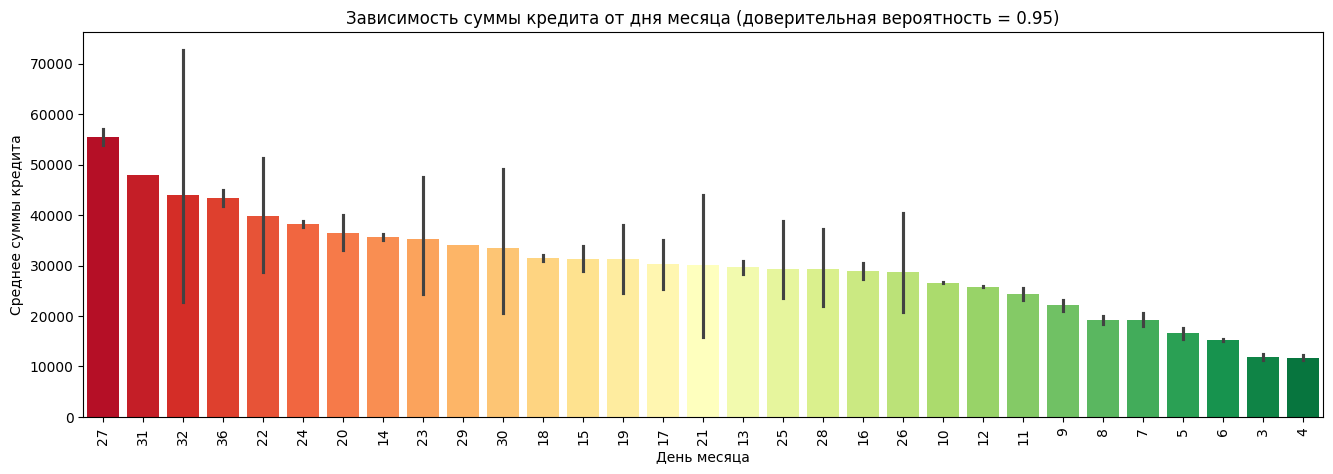

In [29]:
my_barplot(data, 'credit_month', 'credit_sum', 'День месяца', 'дня месяца', 'суммы кредита', (16, 5))

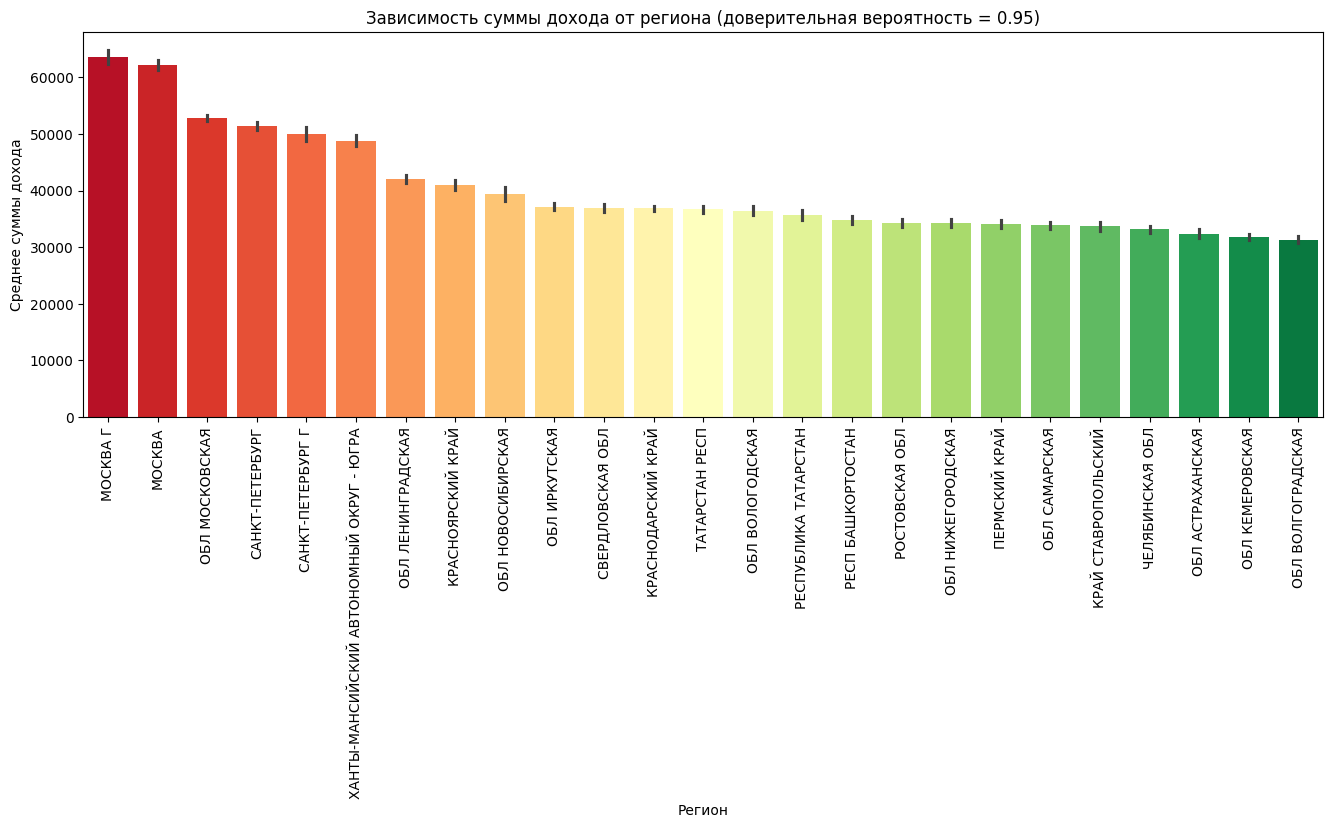

In [30]:
my_barplot(region_mask, 'living_region', 'monthly_income', 'Регион', 'региона', 'суммы дохода', (16, 5))

## Распределение всех заявок по возрастам клиентов

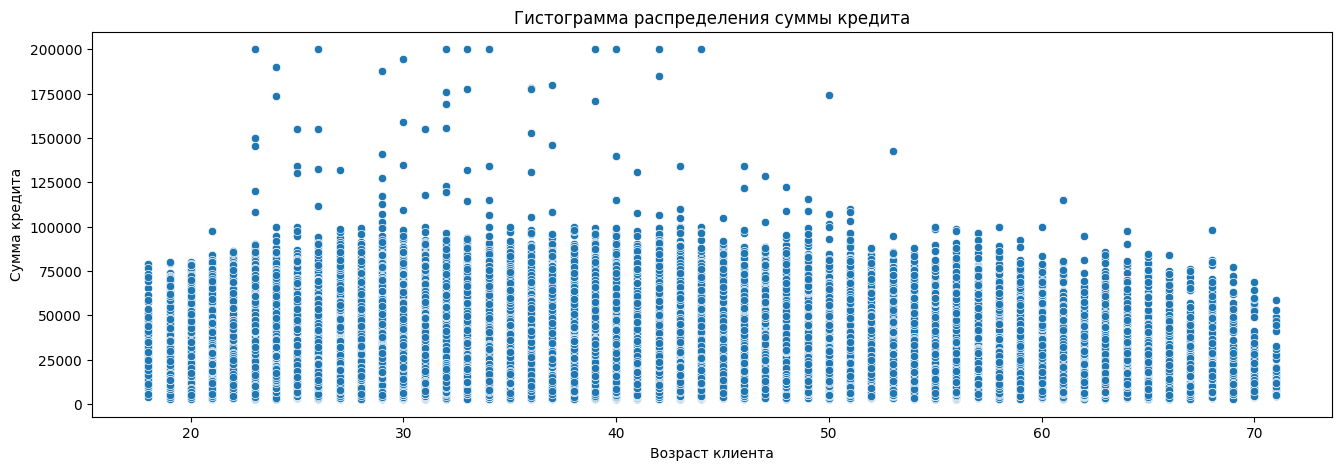

In [43]:
fig = plt.figure(figsize=(16, 5))


plot = sns.scatterplot(data=data, x="age", y="credit_sum")
axes = plot.axes
axes.title.set_text(f"Гистограмма распределения суммы кредита")
axes.set_xlabel('Возраст клиента')
axes.set_ylabel('Сумма кредита')
plt.show()


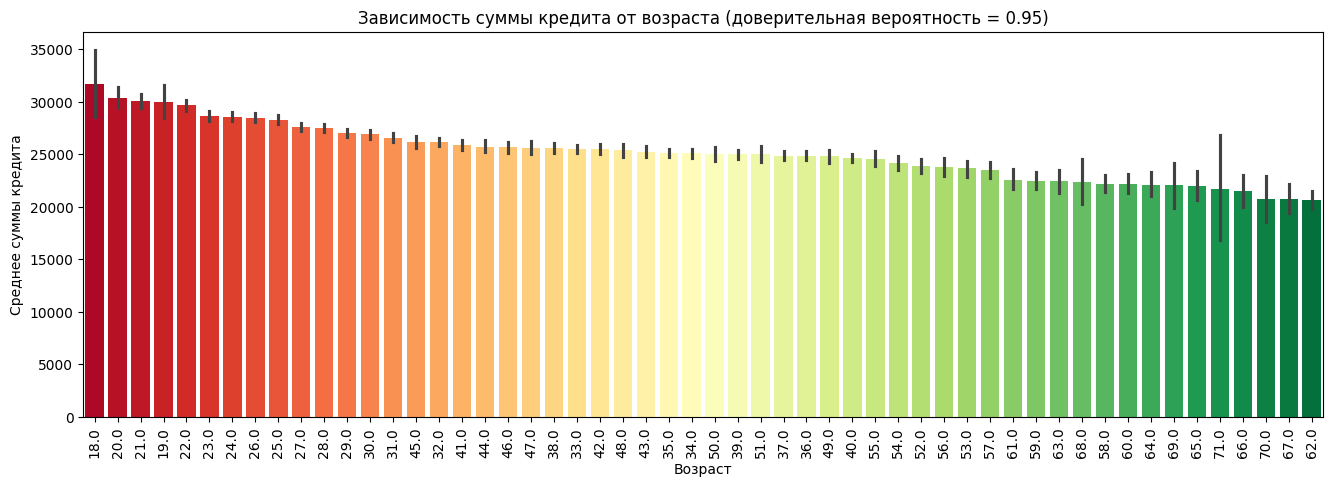

In [46]:
my_barplot(data, 'age', 'credit_sum', 'Возраст', 'возраста', 'суммы кредита', (16, 5))

In [35]:
data_accept = data[data['open_account_flg'] == 1]

In [36]:
data_accept.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30056 entries, 17 to 170729
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                30056 non-null  object 
 1   age                   30056 non-null  float64
 2   marital_status        30056 non-null  object 
 3   job_position          30056 non-null  object 
 4   credit_sum            30056 non-null  float64
 5   credit_month          30056 non-null  int64  
 6   tariff_id             30056 non-null  float64
 7   score_shk             30056 non-null  float64
 8   education             30056 non-null  object 
 9   living_region         30056 non-null  object 
 10  monthly_income        30056 non-null  float64
 11  credit_count          30056 non-null  float64
 12  overdue_credit_count  30056 non-null  float64
 13  open_account_flg      30056 non-null  int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 3.4+ MB


## Распределение одобренных заявок по возрастам клиентов

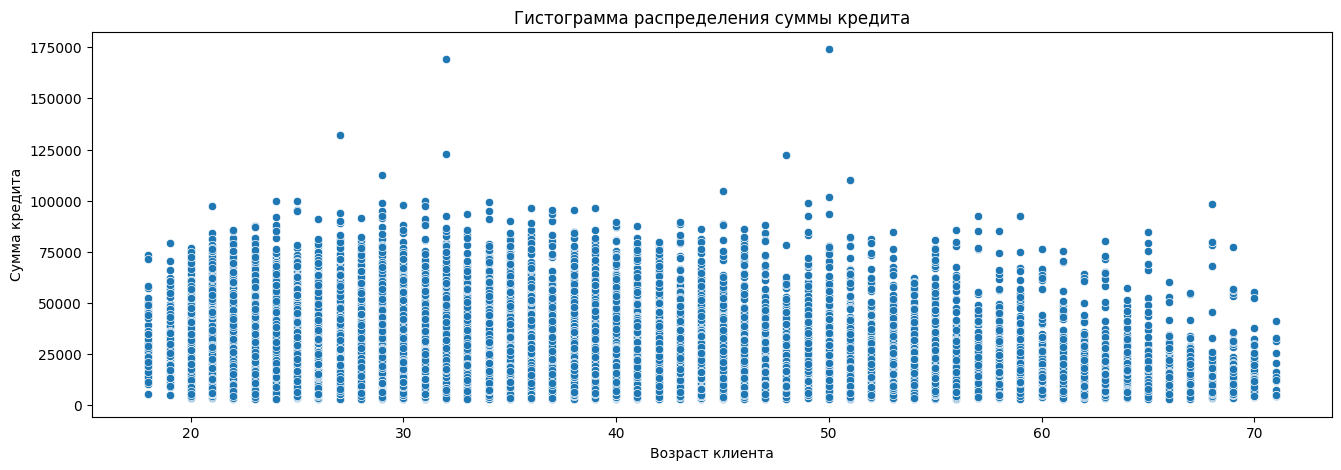

In [44]:
fig = plt.figure(figsize=(16, 5))

plot = sns.scatterplot(data=data_accept, x="age", y="credit_sum")
axes = plot.axes
axes.title.set_text(f"Гистограмма распределения суммы кредита")
axes.set_xlabel('Возраст клиента')
axes.set_ylabel('Сумма кредита')
plt.show()

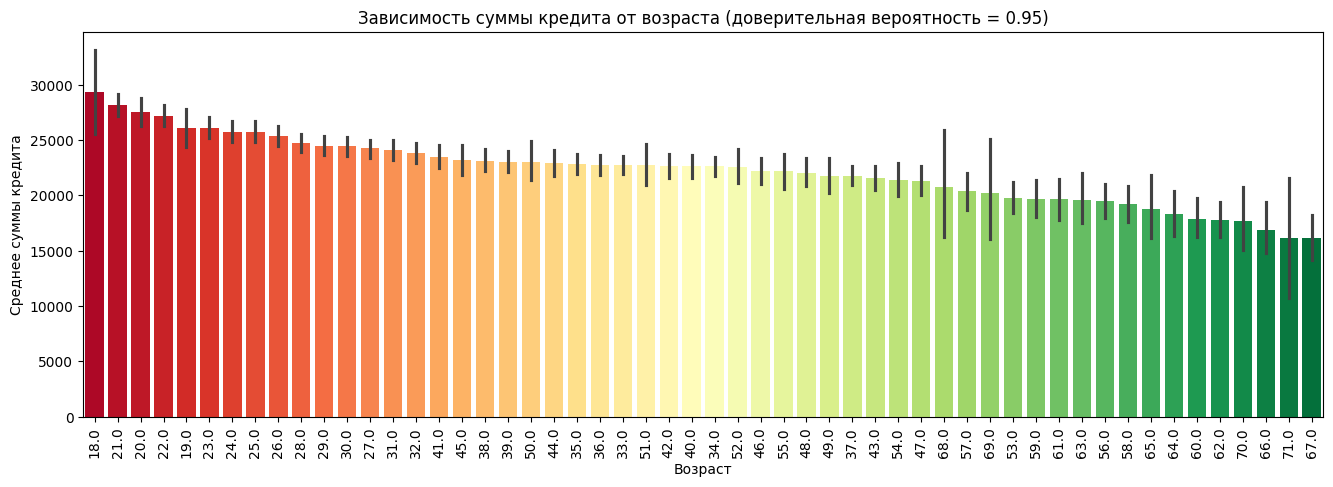

In [45]:
my_barplot(data_accept, 'age', 'credit_sum', 'Возраст', 'возраста', 'суммы кредита', (16, 5))

In [47]:
data_decline = data[data['open_account_flg'] == 0]

## Распределение отклоненных заявок по возрастам клиентов

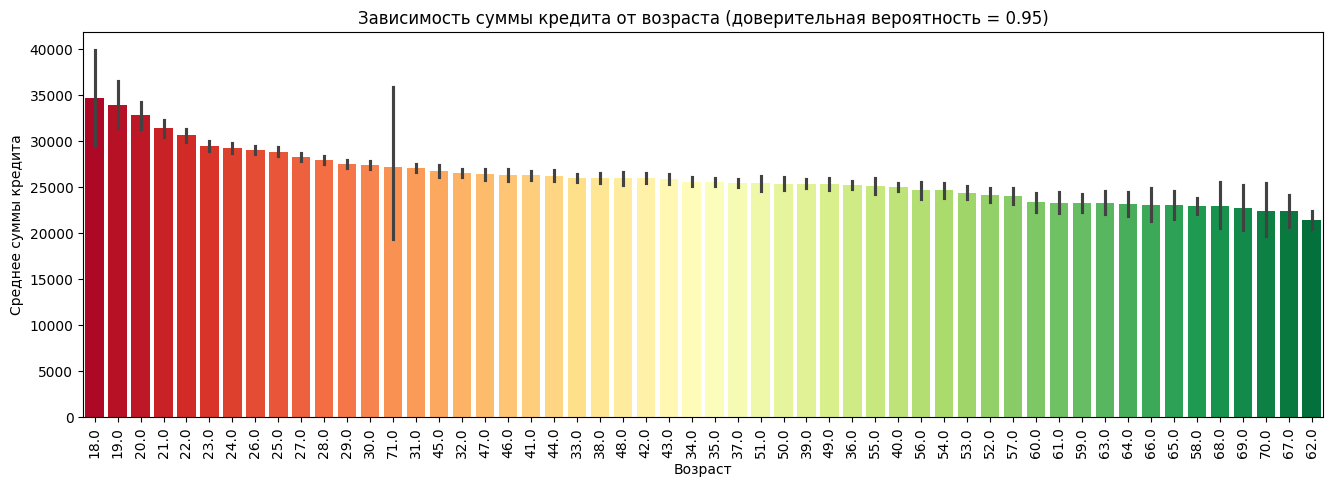

In [48]:
my_barplot(data_decline, 'age', 'credit_sum', 'Возраст', 'возраста', 'суммы кредита', (16, 5))

# Итоговые выводы

- Чем центральнее регион, тем выше средний доход кредитуемых
- Чем центральнее регион, тем больше количество кредитных заявок
- Чем центральнее регион, тем выше требуемая сумма в заявке на кредит
- Чем больше возраст кредитуемого, тем меньше требуемая сумма кредита
- Чем меньше возраст кредитуемого, тем выше шанс одобрения кредита